In [2]:
from model.dataloader import NinaProDatasetLoader, NearlabDatasetLoader
from model.nina_helper import *
import torch
import pandas as pd
from sklearn.utils import shuffle
from scipy import signal
from model.utils import list_files
from model.model import CNet2D

import warnings

warnings.filterwarnings("ignore")

# Load in all Subject Data

In [ ]:
warnings.filterwarnings("ignore")
path_nearlab = "E:/Dennis_Bachelor/Bachelor_Thesis-main/src/data/nearlab/8features/person"

train_paths = []
val_paths = []
test_paths = []
for i in range(1,10):
    file_paths = list_files(path_nearlab+f"{i}", "csv")
    [train_paths.append(x) for x in file_paths]
[val_paths.append(x) for x in list_files(path_nearlab + "10", "csv")]
[test_paths.append(x) for x in list_files(path_nearlab + "11", "csv")]

val_loader = NearlabDatasetLoader(val_paths, val_paths)
X_val, y_val, _, _ = val_loader.load_data()

version = "Softmax"
data = NearlabDatasetLoader(train_paths, test_paths)
X_train, y_train, X_test, y_test = data.load_data()

In [4]:

path_nearlab = "E:/Dennis_Bachelor/Bachelor_Thesis-main/src/data/nearlab/8features/person"

train_paths = []
val_paths = []
test_paths = []
for i in range(1,2):
    file_paths = list_files(path_nearlab+f"{i}", "csv")
    [train_paths.append(x) for x in file_paths]
[val_paths.append(x) for x in list_files(path_nearlab + "10", "csv")]
[test_paths.append(x) for x in list_files(path_nearlab + "11", "csv")]

val_loader = NearlabDatasetLoader(val_paths, val_paths)
X_val, y_val, _, _ = val_loader.load_data()

version = "Softmax"
data = NearlabDatasetLoader(train_paths, test_paths)
X_train, y_train, X_test, y_test = data.load_data()

current_model = CNet2D(version=version, epochs=400, batch_size=128, learning_rate=0.001)
history = current_model.fit(X_train, y_train, 10, X_val, y_val)


Epoch 1/400, Loss: 3.7878
Validation loss: 3.858691930770874
Epoch 2/400, Loss: 3.6632
Validation loss: 3.8460495471954346
Epoch 3/400, Loss: 3.5965
Validation loss: 3.8223989009857178
Epoch 4/400, Loss: 3.5425
Validation loss: 3.7642650604248047
Epoch 5/400, Loss: 3.4897
Validation loss: 3.7525601387023926
Epoch 6/400, Loss: 3.4366
Validation loss: 3.715543270111084
Epoch 7/400, Loss: 3.3877
Validation loss: 3.6986021995544434
Epoch 8/400, Loss: 3.3390
Validation loss: 3.680448055267334
Epoch 9/400, Loss: 3.2943
Validation loss: 3.6660103797912598
Epoch 10/400, Loss: 3.2527
Validation loss: 3.6613962650299072
Epoch 11/400, Loss: 3.2037
Validation loss: 3.6651790142059326
Epoch 12/400, Loss: 3.1701
Validation loss: 3.634486198425293
Epoch 13/400, Loss: 3.1479
Validation loss: 3.6326539516448975
Epoch 14/400, Loss: 3.1227
Validation loss: 3.61928391456604
Epoch 15/400, Loss: 3.1038
Validation loss: 3.605313539505005
Epoch 16/400, Loss: 3.0858
Validation loss: 3.589581251144409
Epoch 17/

In [6]:
path_nearlab = "E:/Dennis_Bachelor/Bachelor_Thesis-main/src/data/nearlab/8features/person3"
file_paths_nearlab = list_files(path_nearlab, "csv")
version = "GLVQ"
data = NearlabDatasetLoader(file_paths_nearlab[:2], file_paths_nearlab[2:])
X_train, y_train, X_val, y_val, X_test, y_test = data.load_data(split_method="file_split")

current_model = CNet2D(version=version, epochs=400, batch_size=128, learning_rate=0.001)
history = current_model.fit(X_train, y_train, 10, X_val, y_val)


print(X_train.shape)

Epoch 1/400, Loss: 0.5000
Validation loss: 1.015513300895691
Epoch 2/400, Loss: 0.4801
Validation loss: 1.0025655031204224
Epoch 3/400, Loss: 0.4575
Validation loss: 0.9604365229606628
Epoch 4/400, Loss: 0.4349
Validation loss: 0.9088398814201355
Epoch 5/400, Loss: 0.4178
Validation loss: 0.8971074223518372
Epoch 6/400, Loss: 0.4014
Validation loss: 0.8279728293418884
Epoch 7/400, Loss: 0.3890
Validation loss: 0.8431159853935242
Epoch 8/400, Loss: 0.3808
Validation loss: 0.7993325591087341
Epoch 9/400, Loss: 0.3723
Validation loss: 0.7636103630065918
Epoch 10/400, Loss: 0.3617
Validation loss: 0.7589757442474365
Epoch 11/400, Loss: 0.3586
Validation loss: 0.725459098815918
Epoch 12/400, Loss: 0.3503
Validation loss: 0.8072943091392517
Epoch 13/400, Loss: 0.3462
Validation loss: 0.787775456905365
Epoch 14/400, Loss: 0.3430
Validation loss: 0.7389828562736511
Epoch 15/400, Loss: 0.3396
Validation loss: 0.7007387280464172
Epoch 16/400, Loss: 0.3355
Validation loss: 0.7224695086479187
Epoc

In [14]:
X_train.shape

torch.Size([71654, 10, 512])

Test Accuracy: 0.8050


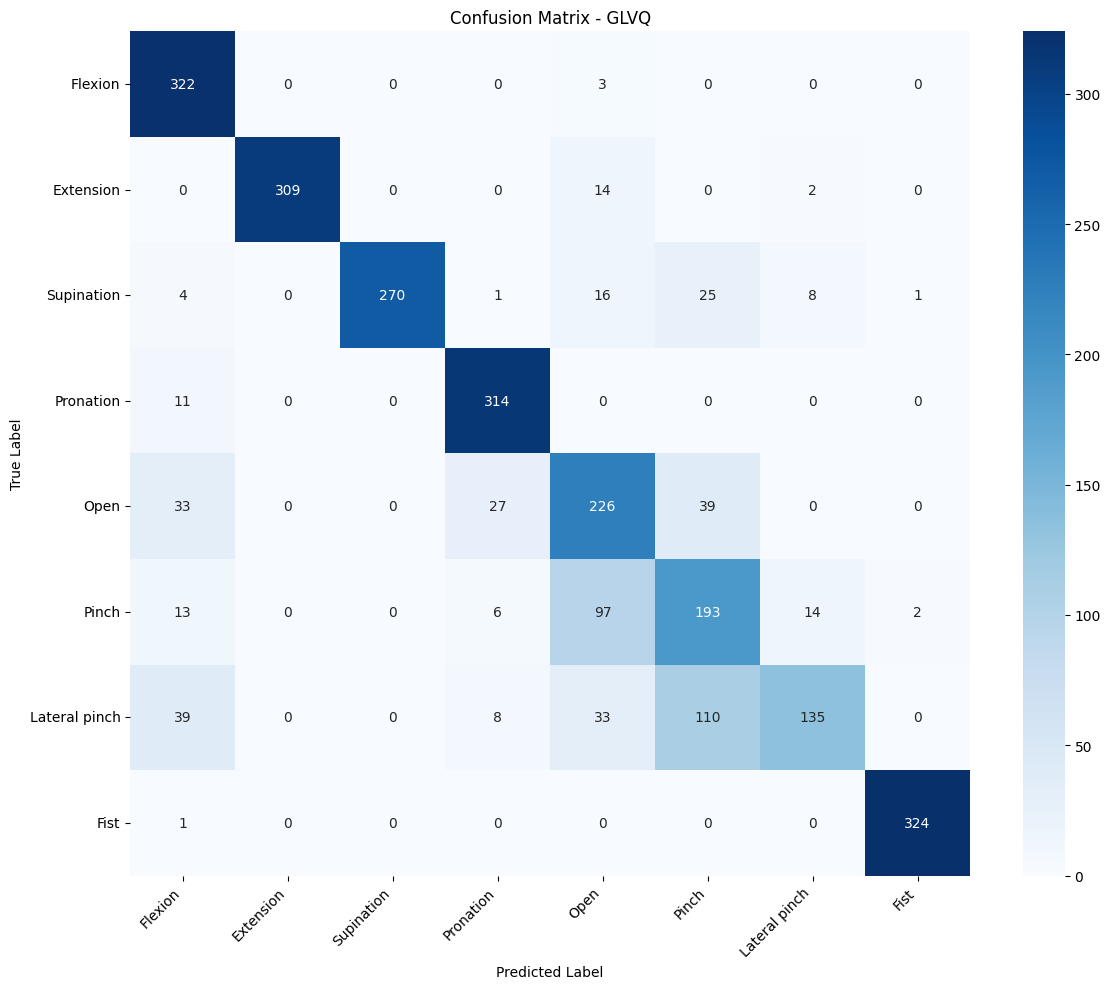


Classification Report:
               precision    recall  f1-score   support

      Flexion       0.76      0.99      0.86       325
    Extension       1.00      0.95      0.97       325
   Supination       1.00      0.83      0.91       325
    Pronation       0.88      0.97      0.92       325
         Open       0.58      0.70      0.63       325
        Pinch       0.53      0.59      0.56       325
Lateral pinch       0.85      0.42      0.56       325
         Fist       0.99      1.00      0.99       325

     accuracy                           0.81      2600
    macro avg       0.82      0.80      0.80      2600
 weighted avg       0.82      0.81      0.80      2600


Per-class Accuracy:
Flexion: 0.9908
Extension: 0.9508
Supination: 0.8308
Pronation: 0.9662
Open: 0.6954
Pinch: 0.5938
Lateral pinch: 0.4154
Fist: 0.9969


{'accuracy': 0.8050000071525574,
 'confusion_matrix': array([[322,   0,   0,   0,   3,   0,   0,   0],
        [  0, 309,   0,   0,  14,   0,   2,   0],
        [  4,   0, 270,   1,  16,  25,   8,   1],
        [ 11,   0,   0, 314,   0,   0,   0,   0],
        [ 33,   0,   0,  27, 226,  39,   0,   0],
        [ 13,   0,   0,   6,  97, 193,  14,   2],
        [ 39,   0,   0,   8,  33, 110, 135,   0],
        [  1,   0,   0,   0,   0,   0,   0, 324]]),
 'per_class_accuracy': array([0.99076923, 0.95076923, 0.83076923, 0.96615385, 0.69538462,
        0.59384615, 0.41538462, 0.99692308]),
 'predictions': [5,
  7,
  3,
  4,
  1,
  5,
  6,
  2,
  1,
  3,
  3,
  2,
  5,
  4,
  2,
  4,
  4,
  1,
  5,
  5,
  1,
  5,
  3,
  3,
  3,
  7,
  7,
  2,
  4,
  4,
  5,
  5,
  3,
  3,
  0,
  1,
  1,
  4,
  3,
  0,
  4,
  0,
  5,
  5,
  1,
  7,
  7,
  6,
  7,
  4,
  2,
  4,
  5,
  7,
  2,
  1,
  1,
  1,
  0,
  0,
  6,
  7,
  2,
  0,
  4,
  0,
  0,
  3,
  7,
  7,
  7,
  7,
  7,
  5,
  7,
  7,
  1,
  1,
  4,

In [7]:
current_model.evaluate_model(X_test, y_test)

In [2]:
folder_path = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/data/ninapro/DB2/person1/"

ninapro = NinaProDatasetLoader(folder_path, 1, 2, 400, 40)

X_train, y_train, X_test, y_test = ninapro.load_data(split_method="balanced", test_reps=2)

print(X_train.shape)

torch.Size([88272, 12, 400])


In [10]:
path_nearlab = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/data/nearlab/8features/person1"
file_paths_nearlab = list_files(path_nearlab, "csv")
version = "GMLVQ"
data = NearlabDatasetLoader(file_paths_nearlab[:2], file_paths_nearlab[2:])
X_train, y_train, X_test, y_test = data.load_data(split_method="repetition_wise")

print(X_train.shape)

torch.Size([4928, 10, 512])
